In [ ]:
import math
import pandas as pd
import numpy as np
from random import choice, shuffle, uniform
from matplotlib import pyplot

from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


Means =  [[29.304, 39.052], [6.324, 19.559], [29.331, 10.432]]


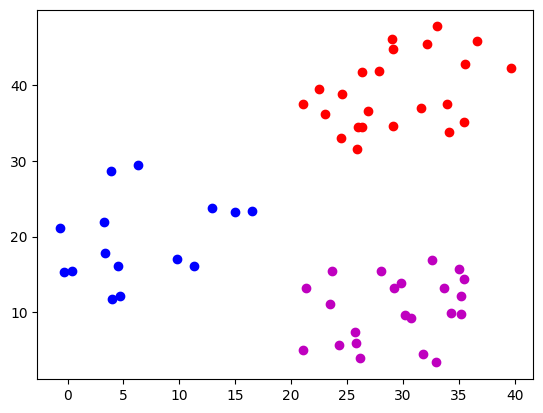

In [ ]:
def ReadData(fileName):
    data = pd.read_csv('/content/drive/MyDrive/ML LAB FINAL/K-Means/kmeans_1BM20CS059.csv')
    items = data.values.tolist()
    shuffle(items)
    return items

def FindColMinMax(items):
    n = len(items[0])
    minima = [float('inf') for _ in range(n)]
    maxima = [float('-inf') for _ in range(n)]

    for item in items:
        for f in range(n):
            if item[f] < minima[f]:
                minima[f] = item[f]
            if item[f] > maxima[f]:
                maxima[f] = item[f]

    return minima, maxima

def EuclideanDistance(x, y):
    S = 0
    for i in range(len(x)):
        S += math.pow(x[i] - y[i], 2)
    return math.sqrt(S)

def InitializeMeans(items, k, cMin, cMax):
    f = len(items[0])
    means = [[0 for _ in range(f)] for _ in range(k)]

    for mean in means:
        for i in range(len(mean)):
            mean[i] = uniform(cMin[i] + 1, cMax[i] - 1)

    return means

def UpdateMean(n, mean, item):
    for i in range(len(mean)):
        m = mean[i]
        m = (m * (n - 1) + item[i]) / float(n)
        mean[i] = round(m, 3)
    return mean

def FindClusters(means, items):
    clusters = [[] for _ in range(len(means))]

    for item in items:
        index = Classify(means, item)
        clusters[index].append(item)

    return clusters

def Classify(means, item):
    minimum = float('inf')
    index = -1

    for i in range(len(means)):
        dis = EuclideanDistance(item, means[i])

        if dis < minimum:
            minimum = dis
            index = i

    return index

def CalculateMeans(k, items, maxIterations=100000):
    cMin, cMax = FindColMinMax(items)
    means = InitializeMeans(items, k, cMin, cMax)
    clusterSizes = [0 for _ in range(len(means))]
    belongsTo = [0 for _ in range(len(items))]

    for _ in range(maxIterations):
        noChange = True
        for i in range(len(items)):
            item = items[i]
            index = Classify(means, item)
            clusterSizes[index] += 1
            cSize = clusterSizes[index]
            means[index] = UpdateMean(cSize, means[index], item)

            if index != belongsTo[i]:
                noChange = False
            belongsTo[i] = index

        if noChange:
            break

    return means

def CutToTwoFeatures(items, indexA, indexB):
    X = [[float(item[indexA]), float(item[indexB])] for item in items]
    return X

def PlotClusters(clusters):
    colors = ['r', 'b', 'g', 'c', 'm', 'y']

    for i, cluster in enumerate(clusters):
        c = choice(colors)
        colors.remove(c)
        Xa = [item[0] for item in cluster]
        Xb = [item[1] for item in cluster]
        pyplot.plot(Xa, Xb, 'o', color=c)

    pyplot.show()

def main():
    items = ReadData('/content/drive/MyDrive/ML LAB/LAB-7/kmeans_1BM20CS059.csv')
    k = 3
    items = CutToTwoFeatures(items, 1, 2)  # Considering 'Age' (index 1) and 'Income($)' (index 2)
    means = CalculateMeans(k, items)
    print("Means = ", means)
    clusters = FindClusters(means, items)
    PlotClusters(clusters)

if __name__ == "__main__":
    main()


Means =  [[38.286, 150000.0], [32.416, 57291.667], [36.333, 84000.0]]


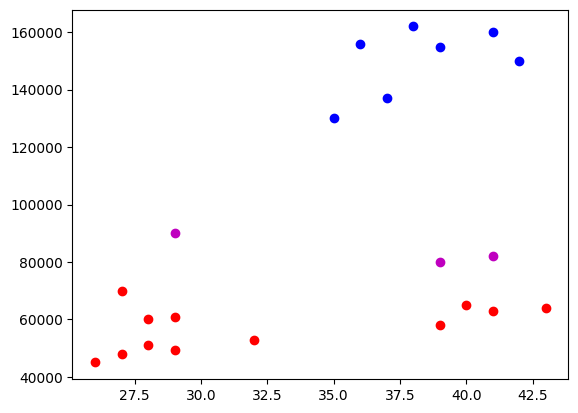

In [ ]:
def ReadData(fileName):
    data = pd.read_csv('/content/drive/MyDrive/ML LAB FINAL/K-Means/income.csv')
    items = data.values.tolist()
    shuffle(items)
    return items

def FindColMinMax(items):
    n = len(items[0])
    minima = [float('inf') for _ in range(n)]
    maxima = [float('-inf') for _ in range(n)]

    for item in items:
        for f in range(n):
            if item[f] < minima[f]:
                minima[f] = item[f]
            if item[f] > maxima[f]:
                maxima[f] = item[f]

    return minima, maxima

def EuclideanDistance(x, y):
    S = 0
    for i in range(len(x)):
        S += math.pow(x[i] - y[i], 2)
    return math.sqrt(S)

def InitializeMeans(items, k, cMin, cMax):
    f = len(items[0])
    means = [[0 for _ in range(f)] for _ in range(k)]

    for mean in means:
        for i in range(len(mean)):
            mean[i] = uniform(cMin[i] + 1, cMax[i] - 1)

    return means

def UpdateMean(n, mean, item):
    for i in range(len(mean)):
        m = mean[i]
        m = (m * (n - 1) + item[i]) / float(n)
        mean[i] = round(m, 3)
    return mean

def FindClusters(means, items):
    clusters = [[] for _ in range(len(means))]

    for item in items:
        index = Classify(means, item)
        clusters[index].append(item)

    return clusters

def Classify(means, item):
    minimum = float('inf')
    index = -1

    for i in range(len(means)):
        dis = EuclideanDistance(item, means[i])

        if dis < minimum:
            minimum = dis
            index = i

    return index

def CalculateMeans(k, items, maxIterations=100000):
    cMin, cMax = FindColMinMax(items)
    means = InitializeMeans(items, k, cMin, cMax)
    clusterSizes = [0 for _ in range(len(means))]
    belongsTo = [0 for _ in range(len(items))]

    for _ in range(maxIterations):
        noChange = True
        for i in range(len(items)):
            item = items[i]
            index = Classify(means, item)
            clusterSizes[index] += 1
            cSize = clusterSizes[index]
            means[index] = UpdateMean(cSize, means[index], item)

            if index != belongsTo[i]:
                noChange = False
            belongsTo[i] = index

        if noChange:
            break

    return means

def CutToTwoFeatures(items, indexA, indexB):
    X = [[float(item[indexA]), float(item[indexB])] for item in items]
    return X

def PlotClusters(clusters):
    colors = ['r', 'b', 'g', 'c', 'm', 'y']

    for i, cluster in enumerate(clusters):
        c = choice(colors)
        colors.remove(c)
        Xa = [item[0] for item in cluster]
        Xb = [item[1] for item in cluster]
        pyplot.plot(Xa, Xb, 'o', color=c)

    pyplot.show()

def main():
    items = ReadData('/content/drive/MyDrive/ML LAB/LAB-7/kmeans_1BM20CS059.csv')
    k = 3
    items = CutToTwoFeatures(items, 1, 2)  # Considering 'Age' (index 1) and 'Income($)' (index 2)
    means = CalculateMeans(k, items)
    print("Means = ", means)
    clusters = FindClusters(means, items)
    PlotClusters(clusters)

if __name__ == "__main__":
    main()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


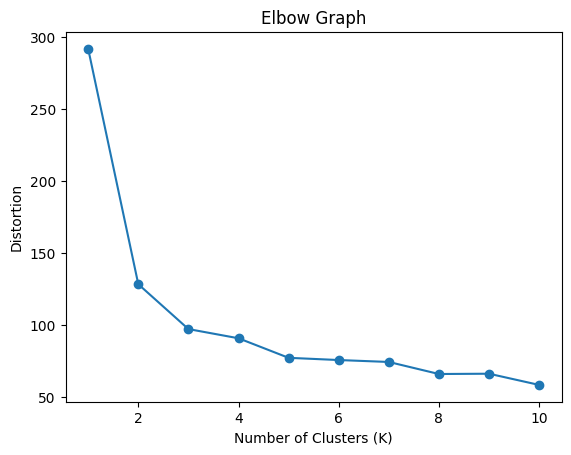

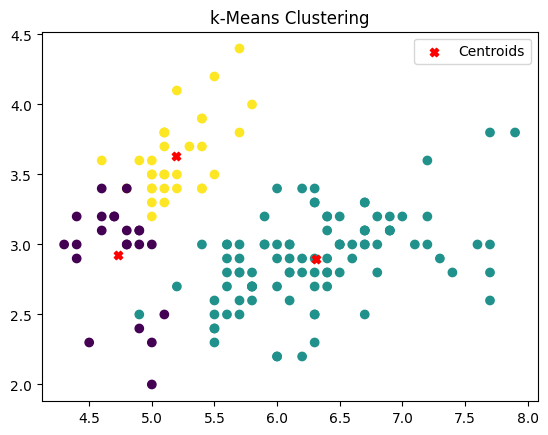

Accuracy: 0.4266666666666667


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
# Load the data
data = pd.read_csv('/content/drive/MyDrive/ML LAB FINAL/Naives Baiyes /iris.csv')  # Replace 'your_data.csv' with the path to your CSV file

# Extract features
X = data.iloc[:, :-1].values  # Features (excluding the last column)
y = data.iloc[:, -1].values  # Ground truth labels

def initialize_centroids(X, K):
    # Randomly initialize centroids
    centroids_indices = np.random.choice(X.shape[0], K, replace=False)
    centroids = X[centroids_indices]
    return centroids

def assign_clusters(X, centroids):
    # Assign data points to the nearest centroid
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=-1)
    labels = np.argmin(distances, axis=1)
    return labels

def update_centroids(X, labels, K):
    # Update centroids based on the mean of assigned data points
    centroids = np.zeros((K, X.shape[1]))
    for i in range(K):
        centroids[i] = np.mean(X[labels == i], axis=0)
    return centroids

def kmeans(X, K, max_iters):
    # Initialize centroids
    centroids = initialize_centroids(X, K)

    # Iterate until convergence or maximum iterations
    for _ in range(max_iters):
        # Assign clusters
        labels = assign_clusters(X, centroids)

        # Update centroids
        new_centroids = update_centroids(X, labels, K)

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

def calculate_accuracy(y_true, y_pred):
    # Calculate accuracy score
    correct = np.sum(y_true == y_pred)
    total = y_true.shape[0]
    accuracy = correct / total
    return accuracy

def plot_clusters(X, labels, centroids):
    # Plot the clusters and centroids
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', label='Centroids')
    plt.title('k-Means Clustering')
    plt.legend()
    plt.show()

def elbow_graph(X, max_clusters):
    # Generate elbow graph to find optimal cluster K
    distortions = []
    for k in range(1, max_clusters+1):
        labels, centroids = kmeans(X, k, max_iters=100)
        distortion = np.sum(np.linalg.norm(X - centroids[labels], axis=1))
        distortions.append(distortion)

    # Plot elbow graph
    plt.plot(range(1, max_clusters+1), distortions, marker='o')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Distortion')
    plt.title('Elbow Graph')
    plt.show()

# Set the maximum number of clusters to try
max_clusters = 10

# Generate elbow graph to find optimal cluster K
elbow_graph(X, max_clusters)

# Choose the optimal cluster K based on the elbow graph
K = 3  # Replace with the chosen optimal K

# Apply k-Means clustering
labels, centroids = kmeans(X, K, max_iters=100)

# Plot the final clusters and centroids
plot_clusters(X, labels, centroids)

# Calculate and print the accuracy score
accuracy = calculate_accuracy(y, labels)
print('Accuracy:', accuracy)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


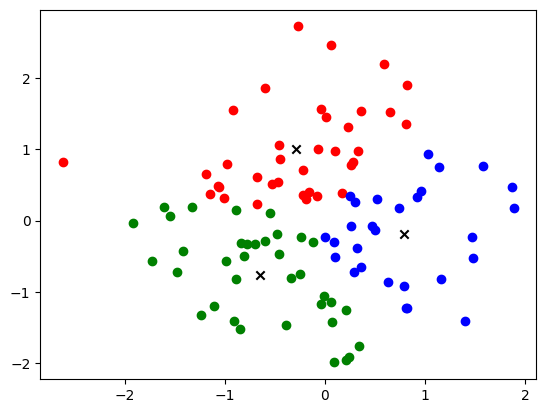

In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')


def kmeans(X, K, max_iters=100):
    # Randomly initialize centroids
    centroids = X[np.random.choice(range(len(X)), size=K, replace=False)]

    for _ in range(max_iters):
        # Assign each data point to the nearest centroid
        clusters = [[] for _ in range(K)]
        for x in X:
            distances = [np.linalg.norm(x - centroid) for centroid in centroids]
            cluster_index = np.argmin(distances)
            clusters[cluster_index].append(x)

        # Update centroids
        new_centroids = []
        for cluster in clusters:
            if cluster:
                new_centroids.append(np.mean(cluster, axis=0))
            else:
                # If a centroid has no assigned points, keep the previous centroid value
                new_centroids.append(centroids[clusters.index(cluster)])

        # Check for convergence
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return centroids, clusters

# Load data from CSV file

data = pd.read_csv('/content/drive/MyDrive/ML LAB FINAL/K-Means/K-Means withoutapi Updated/data.csv')

# Convert data to numpy array
X = data.values

# Perform k-means clustering
K = 3
centroids, clusters = kmeans(X, K)

# Convert centroids list to numpy array
centroids = np.array(centroids)

# Plot the clusters and centroids
colors = ['r', 'g', 'b']
for i, cluster in enumerate(clusters):
    for point in cluster:
        plt.scatter(point[0], point[1], c=colors[i])
plt.scatter(centroids[:, 0], centroids[:, 1], c='k', marker='x')
plt.show()